## Change values for analysis based on the cell 
### Baseline 
#### Change first and last sweep number for each cell based off of when the cell got stable

In [407]:
pre_drug_first_sweep = 11
pre_drug_last_sweep = 25

### Drug wash on
#### Change values for sweep number when you get a stable response to the drug

In [408]:
wash_on_first_sweep = 61
wash_on_last_sweep = 75

### Plus APV
#### Change values for sweep number when you get a stable response to APV wash on

In [409]:

APV_first_sweep = 85
APV_last_sweep = 90

### Import packages you want

In [410]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read in Files

In [411]:
data = loadmat("/Users/joyadler/Desktop/FordLab/RawData/20221017_005.mat")
print("total sweeps: " + str(len(data)))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/joyadler/Desktop/FordLab/RawData/20221017_005.mat'

In [384]:
for i in range(len(data)):
    first_sweep_key = list(data.keys())[i]
    first_value = data[first_sweep_key]

    print(first_sweep_key)
    print(first_value)
    print(' ')

__header__
b'MATLAB 5.0 MAT-file, Platform: MACOSX, Created on: Thu Aug 3 2023  09:20:12\x002\x00/\x002\x000\x002\x002\x001\x000\x001\x007\x00_\x000\x000\x005\x00.\x00m\x00a\x00t\x000\x000'
 
__version__
1.0
 
__globals__
[]
 
c001_Time    N  
[[1.0000e-04 2.0000e-04 3.0000e-04 ... 1.9998e+00 1.9999e+00 2.0000e+00]]
 
c002_Current_Amp1   p 1 
[[-1.0633125e-11 -9.8306250e-12 -1.4110625e-11 ... -2.0664375e-11
  -3.3504375e-11 -1.1034375e-11]]
 
c003_Current_Amp1   p 1 
[[-2.7418750e-11 -2.4275625e-11 -3.2434375e-11 ... -5.1426875e-11
  -5.2028750e-11 -6.1859375e-11]]
 
c004_Current_Amp1   p 1 
[[-7.29606250e-11 -6.48018750e-11 -6.70756250e-11 ... -1.04391875e-10
  -1.05996875e-10 -9.48287500e-11]]
 
c005_Current_Amp1   p 1 
[[-8.59343750e-11 -8.03168750e-11 -8.94118750e-11 ... -1.00580000e-10
  -1.09474375e-10 -9.80387500e-11]]
 
c006_Current_Amp1   p 1 
[[-1.50803125e-10 -1.46255625e-10 -1.41173125e-10 ... -1.35823125e-10
  -1.47593125e-10 -1.40303750e-10]]
 
c007_Current_Amp1   p 1 
[[

In [412]:
len(new_data.keys())

90

## Clean up data and get rid of keys

In [413]:
new_data = data.copy()  # Create a copy of the original dictionary

for i in range(4):  # Remove the first three keys from the copy
    first_sweep_key = list(new_data.keys())[0]
    new_data.pop(first_sweep_key)

for i in range(len(new_data.keys())):  # Modify this line if the dictionary has fewer than 30 keys left
    first_sweep_key = list(new_data.keys())[i]
    first_value = new_data[first_sweep_key]

    print(first_sweep_key)
    print(first_value)
    print(' ')

#pA = np.array(new_data).flatten()
#new_data_df = pd.DataFrame(new_data)
#new_data_df.to_csv('/Users/joyadler/Desktop/df/data.csv')

c002_Current_Amp1   p 1 
[[-1.0633125e-11 -9.8306250e-12 -1.4110625e-11 ... -2.0664375e-11
  -3.3504375e-11 -1.1034375e-11]]
 
c003_Current_Amp1   p 1 
[[-2.7418750e-11 -2.4275625e-11 -3.2434375e-11 ... -5.1426875e-11
  -5.2028750e-11 -6.1859375e-11]]
 
c004_Current_Amp1   p 1 
[[-7.29606250e-11 -6.48018750e-11 -6.70756250e-11 ... -1.04391875e-10
  -1.05996875e-10 -9.48287500e-11]]
 
c005_Current_Amp1   p 1 
[[-8.59343750e-11 -8.03168750e-11 -8.94118750e-11 ... -1.00580000e-10
  -1.09474375e-10 -9.80387500e-11]]
 
c006_Current_Amp1   p 1 
[[-1.50803125e-10 -1.46255625e-10 -1.41173125e-10 ... -1.35823125e-10
  -1.47593125e-10 -1.40303750e-10]]
 
c007_Current_Amp1   p 1 
[[-1.55885625e-10 -1.45854375e-10 -1.53946250e-10 ... -1.61436250e-10
  -1.70531250e-10 -1.71668125e-10]]
 
c008_Current_Amp1   p 1 
[[-1.54280625e-10 -1.46790625e-10 -1.63910625e-10 ... -1.59095625e-10
  -1.56220000e-10 -1.72871875e-10]]
 
c009_Current_Amp1   p 1 
[[-1.76951250e-10 -1.74410000e-10 -1.68993125e-10 ... -1

## Made function to flatten the data

In [397]:
# def flatten_list(new_data):
#     flattened_list = []
#     for item in new_data:
#         if isinstance(item, list):
#             flattened_list.extend(flatten_list(item))
#         else:
#             flattened_list.append(item)
#     return flattened_list

# new_data_list = flatten_list(new_data)

# print(new_data_list)

['c002_Current_Amp1\x00\x00\x00p\x001\x00', 'c003_Current_Amp1\x00\x00\x00p\x001\x00', 'c004_Current_Amp1\x00\x00\x00p\x001\x00', 'c005_Current_Amp1\x00\x00\x00p\x001\x00', 'c006_Current_Amp1\x00\x00\x00p\x001\x00', 'c007_Current_Amp1\x00\x00\x00p\x001\x00', 'c008_Current_Amp1\x00\x00\x00p\x001\x00', 'c009_Current_Amp1\x00\x00\x00p\x001\x00', 'c010_Current_Amp1\x00\x00\x00p\x001\x00', 'c011_Current_Amp1\x00\x00\x00p\x001\x00', 'c012_Current_Amp1\x00\x00\x00p\x001\x00', 'c013_Current_Amp1\x00\x00\x00p\x001\x00', 'c014_Current_Amp1\x00\x00\x00p\x001\x00', 'c015_Current_Amp1\x00\x00\x00p\x001\x00', 'c016_Current_Amp1\x00\x00\x00p\x001\x00', 'c017_Current_Amp1\x00\x00\x00p\x001\x00', 'c018_Current_Amp1\x00\x00\x00p\x001\x00', 'c019_Current_Amp1\x00\x00\x00p\x001\x00', 'c020_Current_Amp1\x00\x00\x00p\x001\x00', 'c021_Current_Amp1\x00\x00\x00p\x001\x00', 'c022_Current_Amp1\x00\x00\x00p\x001\x00', 'c023_Current_Amp1\x00\x00\x00p\x001\x00', 'c024_Current_Amp1\x00\x00\x00p\x001\x00', 'c025_Curr

In [400]:
# new_data_df = pd.DataFrame(new_data_list)
# new_data_df.to_csv('/Users/joyadler/Desktop/df/data.csv', escapechar='\\')

In [402]:
# print(data.keys())
# times = data['c001_Time\x00\x00\x00PF\x00\x00']
# print(times)

# times_0 = times[0]
# print(times_0)


dict_keys(['__header__', '__version__', '__globals__', 'c001_Time\x00\x00\x00 N\x00\x00', 'c002_Current_Amp1\x00\x00\x00p\x001\x00', 'c003_Current_Amp1\x00\x00\x00p\x001\x00', 'c004_Current_Amp1\x00\x00\x00p\x001\x00', 'c005_Current_Amp1\x00\x00\x00p\x001\x00', 'c006_Current_Amp1\x00\x00\x00p\x001\x00', 'c007_Current_Amp1\x00\x00\x00p\x001\x00', 'c008_Current_Amp1\x00\x00\x00p\x001\x00', 'c009_Current_Amp1\x00\x00\x00p\x001\x00', 'c010_Current_Amp1\x00\x00\x00p\x001\x00', 'c011_Current_Amp1\x00\x00\x00p\x001\x00', 'c012_Current_Amp1\x00\x00\x00p\x001\x00', 'c013_Current_Amp1\x00\x00\x00p\x001\x00', 'c014_Current_Amp1\x00\x00\x00p\x001\x00', 'c015_Current_Amp1\x00\x00\x00p\x001\x00', 'c016_Current_Amp1\x00\x00\x00p\x001\x00', 'c017_Current_Amp1\x00\x00\x00p\x001\x00', 'c018_Current_Amp1\x00\x00\x00p\x001\x00', 'c019_Current_Amp1\x00\x00\x00p\x001\x00', 'c020_Current_Amp1\x00\x00\x00p\x001\x00', 'c021_Current_Amp1\x00\x00\x00p\x001\x00', 'c022_Current_Amp1\x00\x00\x00p\x001\x00', 'c023_C

KeyError: 'c001_Time\x00\x00\x00PF\x00\x00'

## Plot all traces

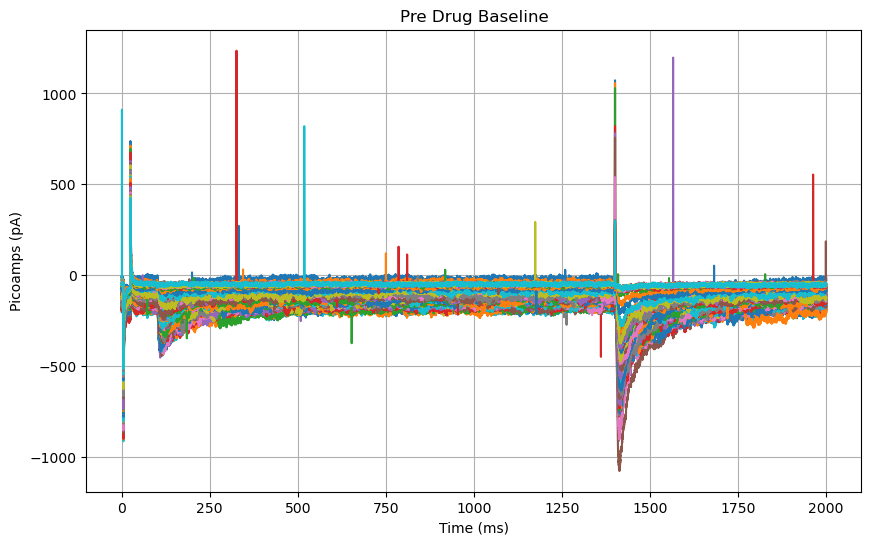

In [414]:



plt.figure(figsize=(10, 6))  # Create a new figure to look at your sweeps


# Plot pA data over time for each trial
for trial_name, pA in list(new_data.items()):
    pA = np.array(pA).flatten()  # flatten the array becuase it is 2D
    times = np.linspace(0, len(pA)/10, len(pA))  # create a time array
    plt.plot(times, pA * 1e12)  # multiplying by 1e12 to convert the unit from A to pA
   # break  # Break the loop after the first iteration
    

#plt.ylim(-800, 800) # adjust data range in pA
#plt.xlim(1250, 1500) # adjust this according to your data range in pA

plt.xlabel('Time (ms)')  # Add a label to the x-axis
plt.ylabel('Picoamps (pA)')  # Add a label to the y-axis
plt.title('Pre Drug Baseline')  # Add a title

plt.grid(True)  # Show grid lines (optional)

plt.show()  # Display the plot

## Make function to graph for Baseline values and find the baseline ampliutde

In [415]:

def plot_times(new_data, start_time, end_time):  
    plt.figure(figsize=(10, 6))  # Create a new figure to look at your sweeps

    # Plot pA data over time for each trial
    for trial_name, pA in list(new_data.items())[pre_drug_first_sweep:pre_drug_last_sweep]:
        pA = np.array(pA).flatten()  # flatten the array becuase it is 2D
        times = np.linspace(0, len(pA)/10, len(pA))  # create a time array
        plt.plot(times, pA * 1e12)  # multiplying by 1e12 to convert the unit from A to pA
        #break  # Break the loop after the first iteration
        
    #look only at specific time points for your base amp pre stim
    plt.ylim(-1000, 800) # adjust data range in pA
    plt.xlim(start_time, end_time) # adjust this according to your data range in pA


    plt.xlabel('Time (ms)')  # Add a label to the x-axis
    plt.ylabel('Picoamps (pA)')  # Add a label to the y-axis
    plt.title('Base amp')  # Add a title

    plt.grid(True)  # Show grid lines (optional)

    plt.show()  # Display the plot


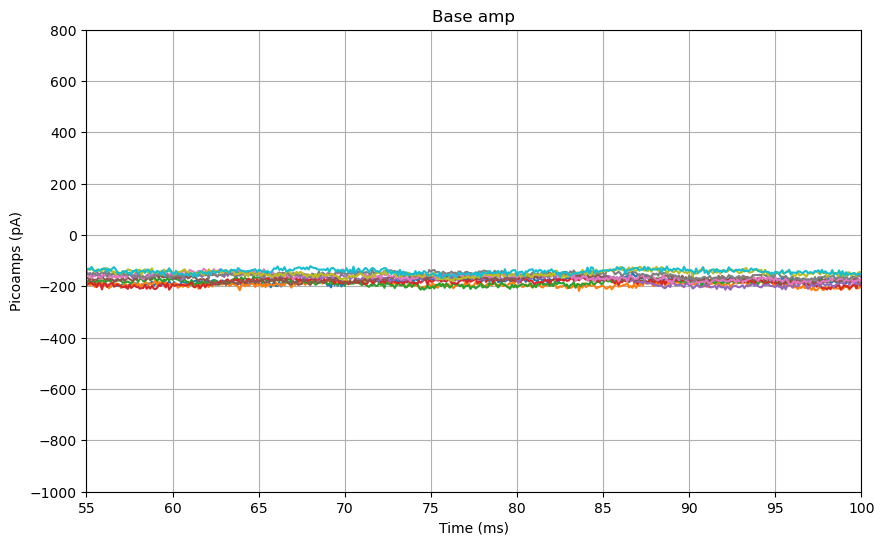

In [405]:
plot_times(new_data, 55,100)

## Make funciton to find the values for your baseline amplitude
### first for pre drug 

In [418]:

def calculate_average_baseline_amp(new_data, pre_drug_first_sweep, pre_drug_last_sweep,baseline_window = (550, 1000)): #use these values because you already defined the beginning and end 
    count = 0
    total = np.zeros(baseline_window[1]-baseline_window[0]) #np.zeros lets you fill in as you go from start to end of your set times 
    

    for sweep, value in enumerate(new_data.values()): #enumerate lets you run throgh the list of your keys
        if pre_drug_first_sweep <= sweep <= pre_drug_last_sweep:
            count += 1
            total += value[0][baseline_window[0]:baseline_window[1]] #value[0] becuase you have a nested list, one is the list itself and one is the values
            #print(baseline_window)
          

    
            #to get just the values, you want to index to them
    if count == 0:
        return None  # Return None if there are no data points in the specified time period
    else:
        return total / count

#average_baseline_value_pre_drug = np.array(list(filter(None, average_baseline_value_pre_drug)))
average_baseline_value_pre_drug = calculate_average_baseline_amp(new_data, pre_drug_first_sweep, pre_drug_last_sweep)
# print(average_value) #output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need


baseline_avg_pre_drug = np.average(average_baseline_value_pre_drug)
pA_avg_pre_drug = baseline_avg_pre_drug*(10 ** 12)
print(pA_avg_pre_drug)
#output gives you the average baseline over the 45ms peiod you wanted, within the sweeps you identified by pre_drug_last_sweep
#use this function for the other baselines as well, but change the sweep numbers from pre_drug_last_sweep to wash_on_first etc...

-157.9849550925926


In [419]:
# def find_value_indices_2D(new_data, target_value):
#     indices = []
#     for row_idx, row in enumerate(new_data):
#         for col_idx, value in enumerate(row):
#             if value == target_value:
#                 indices.append((row_idx, col_idx))
   
#     return indices

# find_value_indices_2D(new_data, -8.86762500e-11)

[]

### Then for wash on

In [421]:
def calculate_average_baseline_amp_wash_on(new_data, wash_on_first_sweep, wash_on_last_sweep,baseline_window = (550, 1000)): #use these values because you already defined the beginning and end 
    count = 0
    total = np.zeros(baseline_window[1]-baseline_window[0]) #np.zeros lets you fill in as you go from start to end of your set times 
    

    for sweep, value in enumerate(new_data.values()): #enumerate lets you run throgh the list of your keys
        if wash_on_first_sweep <= sweep <= wash_on_last_sweep:
            count += 1
            total += value[0][baseline_window[0]:baseline_window[1]] #value[0] becuase you have a nested list, one is the list itself and one is the values

            # print(value[0][baseline_window[0]:baseline_window[1]])
            #to get just the values, you want to index to them
    if count == 0:
        return None  # Return None if there are no data points in the specified time period
    else:
        return total / count


average_baseline_value_wash_on = calculate_average_baseline_amp_wash_on(new_data, wash_on_first_sweep, wash_on_last_sweep)
# print(average_value) #output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need


baseline_avg_wash_on = np.average(average_baseline_value_wash_on)
pA_avg_wash_on = baseline_avg_wash_on*(10 ** 12)
print(pA_avg_wash_on)

-95.93263333333333


### And finally for APV

In [423]:
def calculate_average_baseline_amp_APV(new_data, APV_first_sweep, APV_last_sweep,baseline_window = (550, 1000)): #use these values because you already defined the beginning and end 
    count = 0
    total = np.zeros(baseline_window[1]-baseline_window[0]) #np.zeros lets you fill in as you go from start to end of your set times 
    

    for sweep, value in enumerate(new_data.values()): #enumerate lets you run throgh the list of your keys
        if APV_first_sweep <= sweep <= APV_last_sweep:
            count += 1
            total += value[0][baseline_window[0]:baseline_window[1]] #value[0] becuase you have a nested list, one is the list itself and one is the values

            # print(value[0][baseline_window[0]:baseline_window[1]])
            #to get just the values, you want to index to them
    if count == 0:
        return None  # Return None if there are no data points in the specified time period
    else:
        return total / count


average_baseline_value_APV = calculate_average_baseline_amp_APV(new_data, APV_first_sweep, APV_last_sweep)
# print(average_value) #output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need


baseline_avg_APV = np.average(average_baseline_value_APV)
pA_avg_APV = baseline_avg_APV*(10 ** 12)
print(pA_avg_APV)

-49.25813361111111


## Find values of peak (min) response at pre_drug sweeps
### first graph the time during the peaks to make sure they look right 


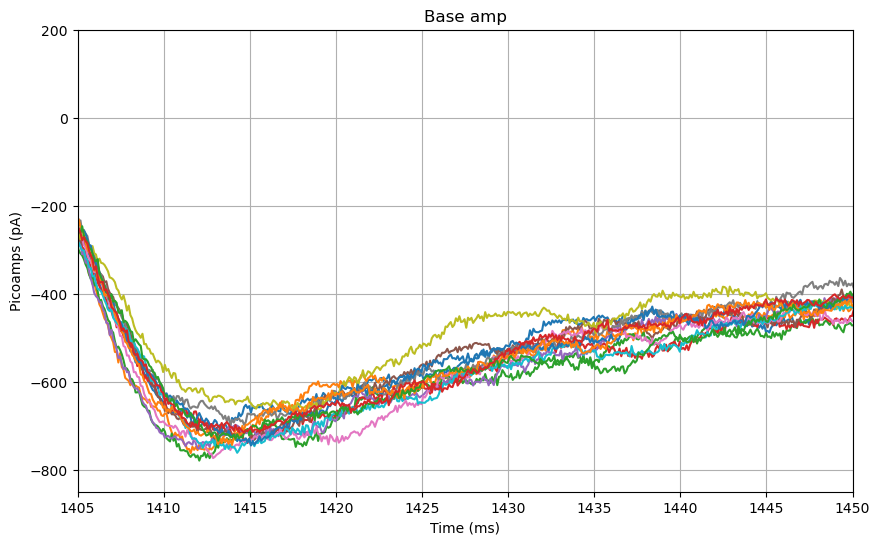

In [435]:
plt.figure(figsize=(10, 6))  # Create a new figure to look at your sweeps

# Plot pA data over time for each trial
for trial_name, pA in list(new_data.items())[pre_drug_first_sweep:pre_drug_last_sweep]:
    pA = np.array(pA).flatten()  # flatten the array becuase it is 2D
    times = np.linspace(0, len(pA)/10, len(pA))  # create a time array
    plt.plot(times, pA * 1e12)  # multiplying by 1e12 to convert the unit from A to pA
    #break  # Break the loop after the first iteration
    
#look only at specific time points for your base amp pre stim
plt.ylim(-850, 200) # adjust data range in pA
plt.xlim(1405,1450) # adjust this according to your data range in pA


plt.xlabel('Time (ms)')  # Add a label to the x-axis
plt.ylabel('Picoamps (pA)')  # Add a label to the y-axis
plt.title('Base amp')  # Add a title

plt.grid(True)  # Show grid lines (optional)

plt.show()  # Display the plot


### Find the values for your drug wash on min amplitude (average of peak +/- 1ms) of first response

In [438]:
def calculate_average_first_peak_pre_drug(new_data, pre_drug_first_sweep, pre_drug_last_sweep,first_peak_window = (100, 150)): #use these values because you already defined the beginning and end 
    count = 0
    total = np.zeros(first_peak_window[1]-first_peak_window[0]) #np.zeros lets you fill in as you go from start to end of your set times 
    

    for sweep, value in enumerate(new_data.values()): #enumerate lets you run throgh the list of your keys
        if pre_drug_first_sweep <= sweep <= pre_drug_last_sweep:
            count += 1
            total += min(value[0][first_peak_window[0]:first_peak_window[1]]) #value[0] becuase you have a nested list, one is the list itself and one is the values
            #to get just the values, you want to index to them
            print(total)
    if count == 0:
        return None  # Return None if there are no data points in the specified time period
    else:
        return total / count



average_first_peak_value_pre_drug = calculate_average_first_peak_pre_drug(new_data, pre_drug_first_sweep, pre_drug_last_sweep)
# print(average_value) #output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need


first_peak_avg_pre_drug = np.average(average_first_peak_value_pre_drug)
pA_first_peak_pre_drug = first_peak_avg_pre_drug*(10 ** 12)
print(pA_first_peak_pre_drug)





[-2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10
 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10
 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10
 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10
 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10
 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10
 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10
 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10
 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10
 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10 -2.629525e-10]
[-5.19685625e-10 -5.19685625e-10 -5.19685625e-10 -5.19685625e-10
 -5.19685625e-10 -5.19685625e-10 -5.19685625e-10 -5.19685625e-10
 -5.19685625e-10 -5.19685625e-10 -5.19685625e-10 -5.19685625e-10
 -5.19685625e-10 -5.19685625e-10 -5.19685625e-10 -5.19685625e-10
 -5.19685625e-10 -5.19685625e

## peak(min value) of second response


In [434]:
def calculate_average_second_peak_pre_drug(new_data, pre_drug_first_sweep, pre_drug_last_sweep,second_peak_window = (1405,1450)): #use these values because you already defined the beginning and end 
    count = 0
    total = np.zeros(second_peak_window[1]-second_peak_window[0]) #np.zeros lets you fill in as you go from start to end of your set times 
    

    for sweep, value in enumerate(new_data.values()): #enumerate lets you run throgh the list of your keys
        if pre_drug_first_sweep <= sweep <= pre_drug_last_sweep:
            count += 1
            total += min(value[0][second_peak_window[0]:second_peak_window[1]]) #value[0] becuase you have a nested list, one is the list itself and one is the values
            #to get just the values, you want to index to them
    if count == 0:
        return None  # Return None if there are no data points in the specified time period
    else:
        return total / count
        print(min_value)


average_second_peak_value_pre_drug = calculate_average_second_peak_pre_drug(new_data, pre_drug_first_sweep, pre_drug_last_sweep)
# print(average_value) #output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need


second_peak_avg_pre_drug = np.average(average_second_peak_value_pre_drug)
pA_second_peak_pre_drug = second_peak_avg_pre_drug*(10 ** 12)
print(pA_second_peak_pre_drug)


-733.4270416666667


In [250]:
#then subtract the average peak value from the baseline to get your response

In [252]:
# get for loop of data for baseline amp
for trial_name, pA in new_data.items():
     pA = np.array(pA).flatten()  # flatten the array becuase it is 2D
    times = np.linspace(0, len(pA)/10, len(pA))  # create a time array
    plt.plot(times, pA * 1e12)  # multiplying by 1e12 to convert the unit from A to pA
    
# def run_specific_sweeps(num_sweeps):
# for sweep in range(1, num_sweeps + 1):
    


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)